In [1]:
#importing necessary libraries
import tensorflow as tf
from tensorflow import keras

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
#import dataset and split into train and test data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 80s 7us/step


In [4]:
#to see length of training dataset
len(x_train)

60000

In [5]:
##to see length of testing dataset
len(x_test)

10000

In [6]:
#shape of training dataset  60,000 images having 28*28 size
x_train.shape

(60000, 28, 28)

In [7]:
#shape of testing dataset  10,000 images having 28*28 size
x_test.shape

(10000, 28, 28)

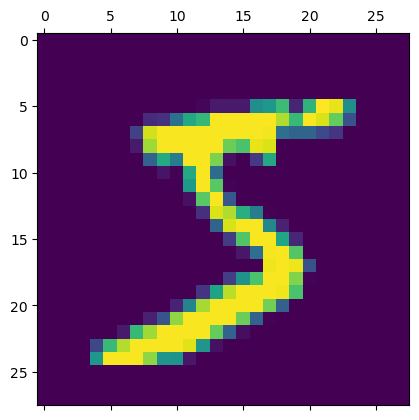

In [9]:
#to see how first image look
plt.matshow(x_train[0])

In [10]:
#normalize the images by scaling pixel intensities to the range 0,1

x_train = x_train / 255
x_test = x_test / 255


In [11]:

x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.summary()

# # Compile the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# # Train the model

In [15]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

# # Evaluate the model

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.6530 - accuracy: 0.8328 - val_loss: 0.3547 - val_accuracy: 0.9032
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3358 - accuracy: 0.9049 - val_loss: 0.2920 - val_accuracy: 0.9172
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2880 - accuracy: 0.9183 - val_loss: 0.2593 - val_accuracy: 0.9274
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2583 - accuracy: 0.9275 - val_loss: 0.2370 - val_accuracy: 0.9323
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2355 - accuracy: 0.9342 - val_loss: 0.2199 - val_accuracy: 0.9374
Epoch 6/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2174 - accuracy: 0.9395 - val_loss: 0.2059 - val_accuracy: 0.9413
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2021 - accuracy: 0.9437 - val_loss: 0.1936 - val

In [16]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

# # Making Prediction on New Data

313/313 [==============================] - 3s 9ms/step - loss: 0.1633 - accuracy: 0.9513
Loss=0.163
Accuracy=0.951


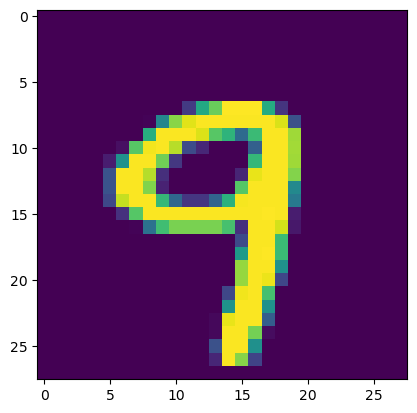

In [17]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [18]:
#we use predict() on new data
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

# # Plot graph for Accuracy and Loss

313/313 [==============================] - 4s 9ms/step
Handwritten number in the image is= 9


In [19]:
get_ipython().run_line_magic('pinfo2', 'history.history')

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

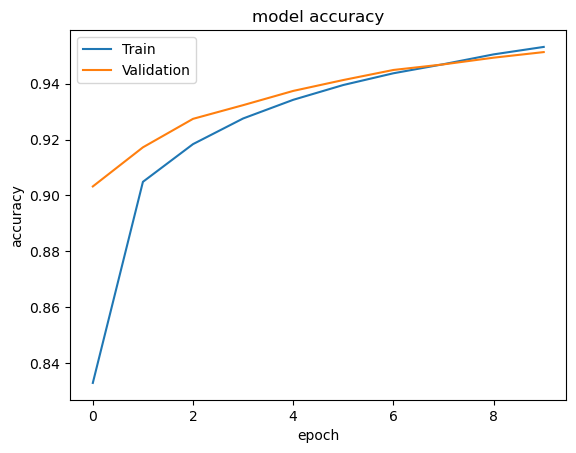

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# graph representing the model’s accuracy

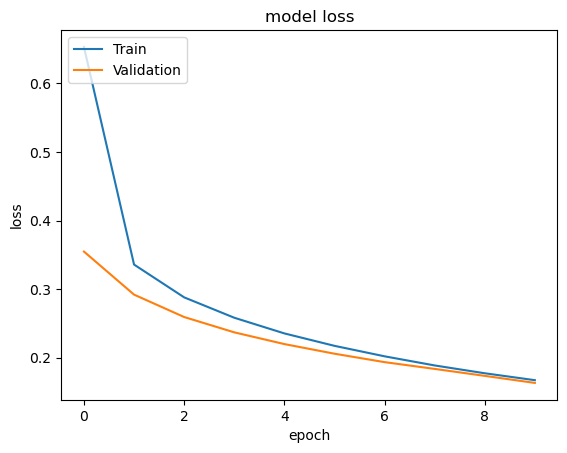

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# graph represents the model’s loss

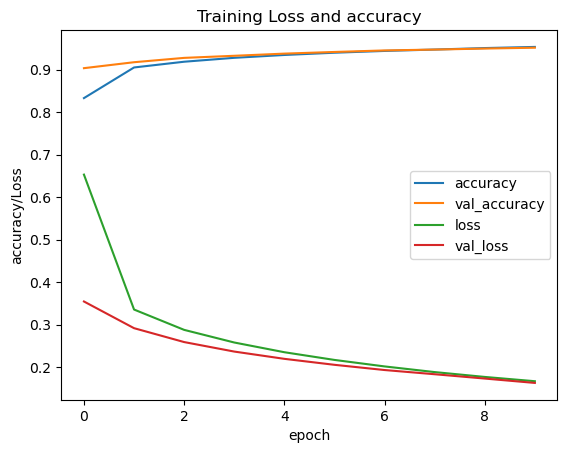

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()

In [24]:
#pwd

# # Save the model
keras_model_path='C:\Users\ashis\OneDrive\Desktop\Deep Learning'
model.save(keras_model_path)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2561125329.py, line 4)

In [ ]:
#use the save model
restored_keras_model = tf.keras.models.load_model(keras_model_path)